# **VALORANT PLAYER'S STATS ANALYSIS**


## Gaming Understanding

### Valorant is a free-to-play first-person hero shooter developed and published by Riot Games. It was released for Microsoft Windows in June 2020. The game features a variety of characters, called Agents, each with unique abilities. Players must work together to complete objectives such as planting or defusing a bomb, or eliminating all enemy players.


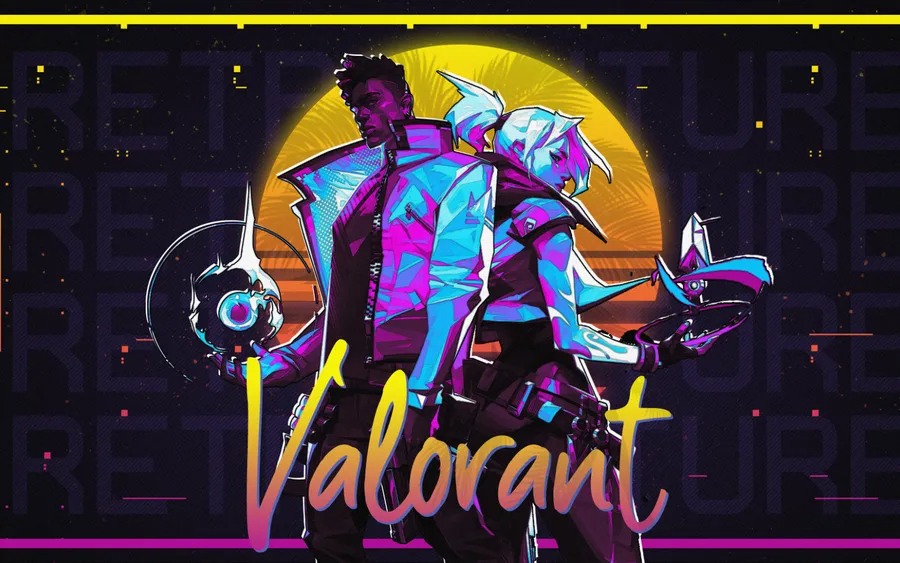

#### In this project, we focused to answer the following questions:
1. What are the 10 most popular agents in Valorant ? 

2. Linear Regreesion for both dataset 

3. Decision tree for both dataset 

4. Heatmap for both dataset 

5. K means Clustering  for both dataset 

6. Outliers for both dataset 


In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #used for ploting graph
plt.style.use('bmh') #used for ploting graph
plt.show() #display different types for chart and graphs
# used for data classification using decision tree 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import pandas as pd


## Fetching main file i.e. Player Statistic.csv

In [45]:
df = pd.read_csv("Player Statistics.csv")
df.head()  # Display the first 5 rows of the DataFrame


Player   Age             Team     Current Team  Birth Date  Maps  Kills  \
0   zekken  19.0        Sentinels        Sentinels  2005-03-19    20    381   
1   ZmjjKK  20.0    EDward Gaming    EDward Gaming  2004-03-03     8    135   
2  N4RRATE  21.0     Karmine Corp     Karmine Corp  2002-11-25     7    132   
3  MiniBoo  19.0    Team Heretics    Team Heretics  2005-07-11     6    114   
4   Autumn  23.0  FunPlus Phoenix  FunPlus Phoenix  2001-11-09     4     68   

   Deaths  Assists  KillperDeath   KDA  ACS/Map  K/Map  D/Map  A/Map  
0     314       90          1.21  1.50      259   19.0   15.7    4.5  
1     125       39          1.08  1.39      252   16.8   15.6    4.8  
2     104       65          1.26  1.89      245   18.8   14.8    9.2  
3      92       37          1.23  1.64      245   19.0   15.3    6.1  
4      71       16          0.95  1.18      231   17.0   17.7    4.0

 # Exploratory Data Analysis on Players Statistics.csv

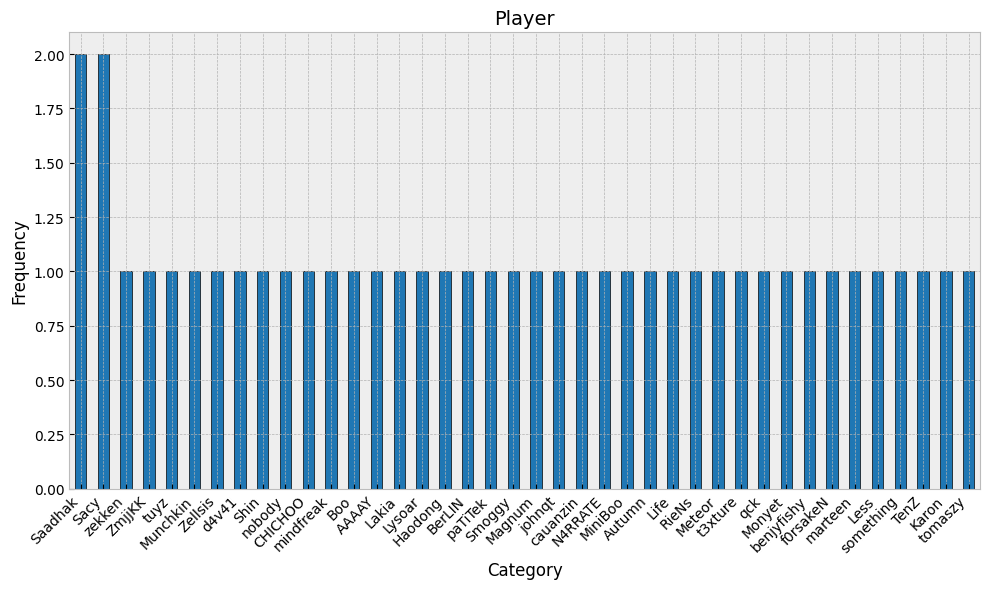

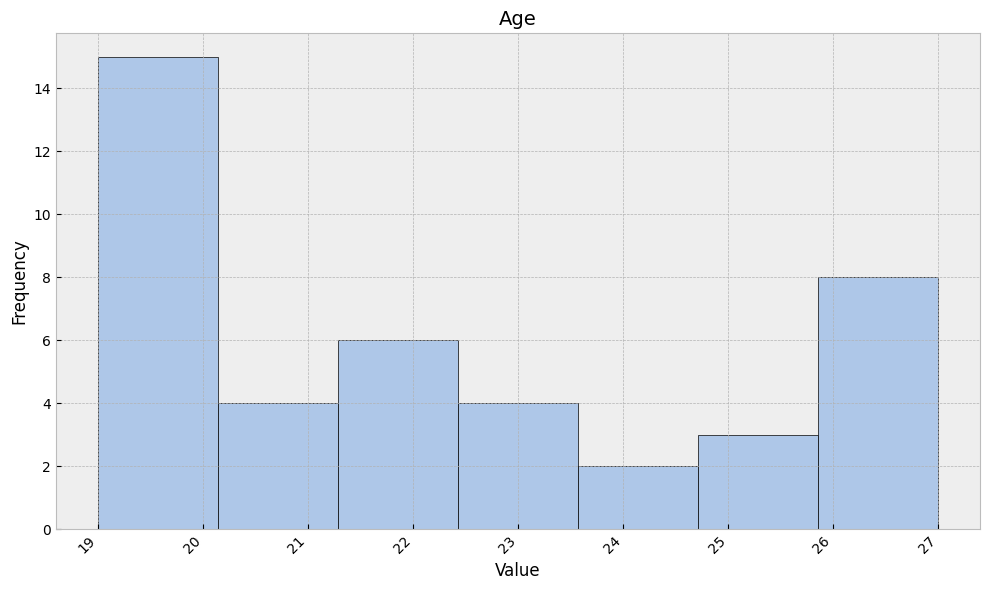

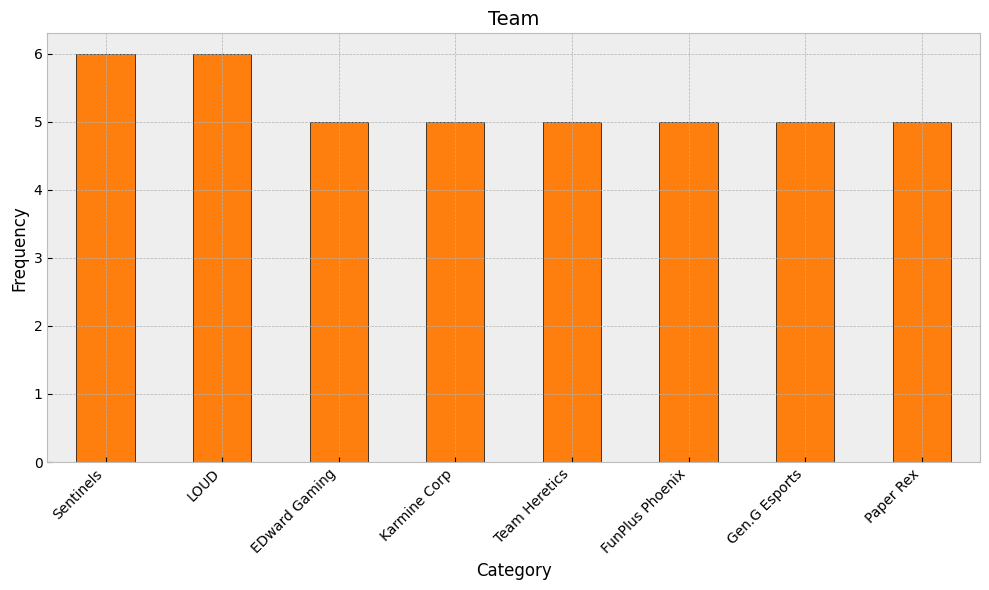

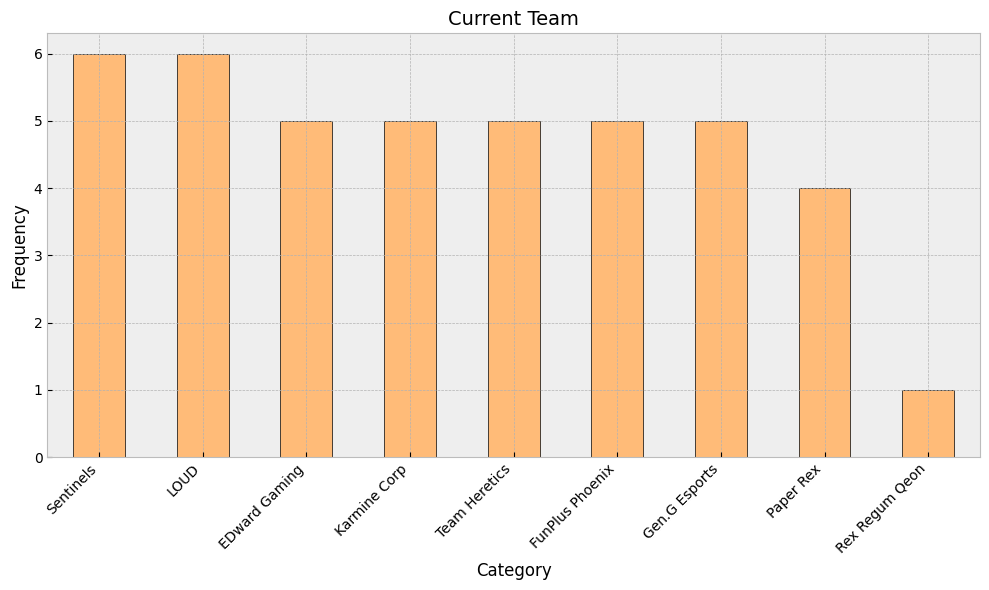

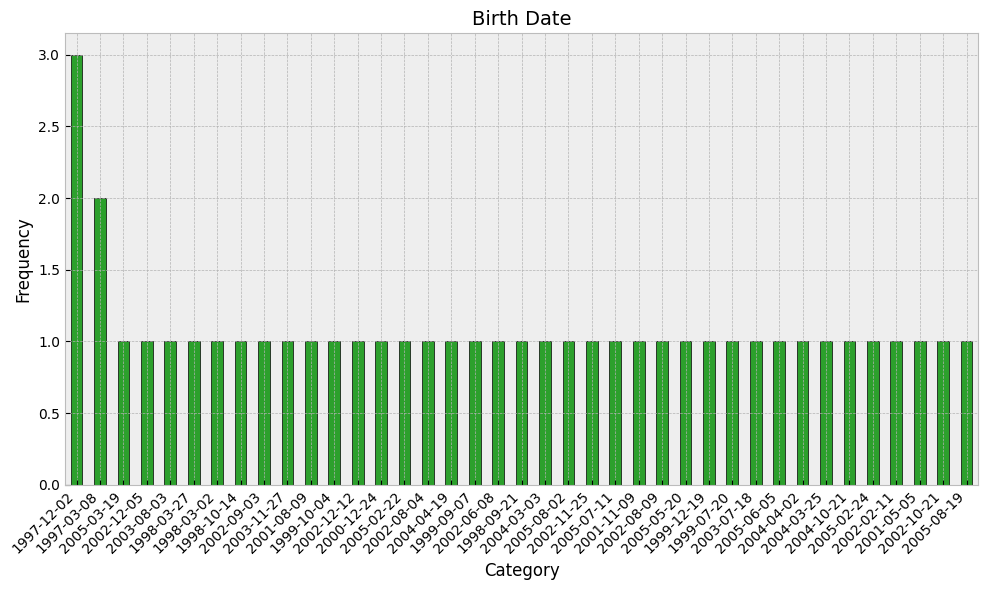

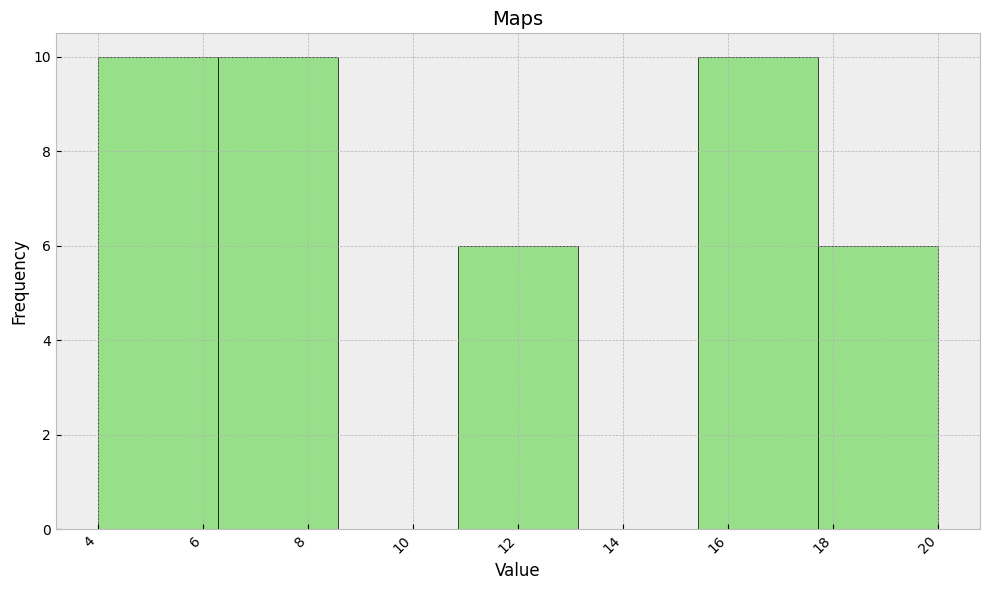

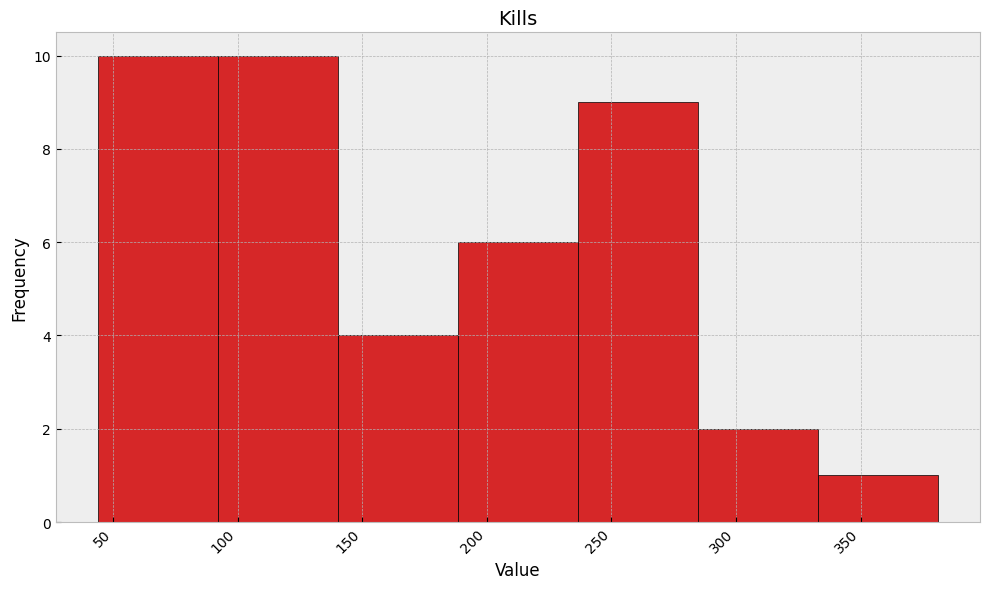

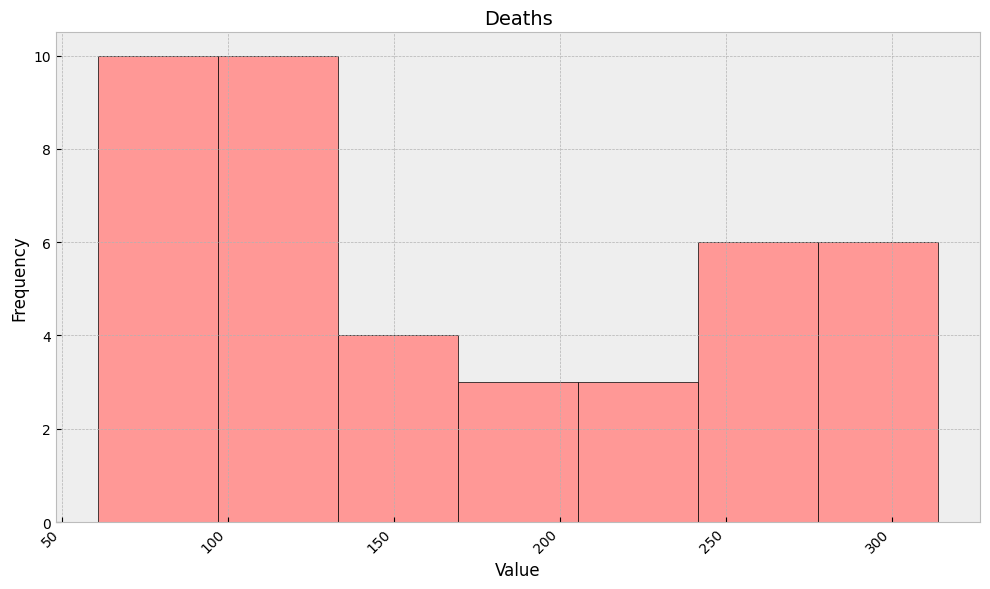

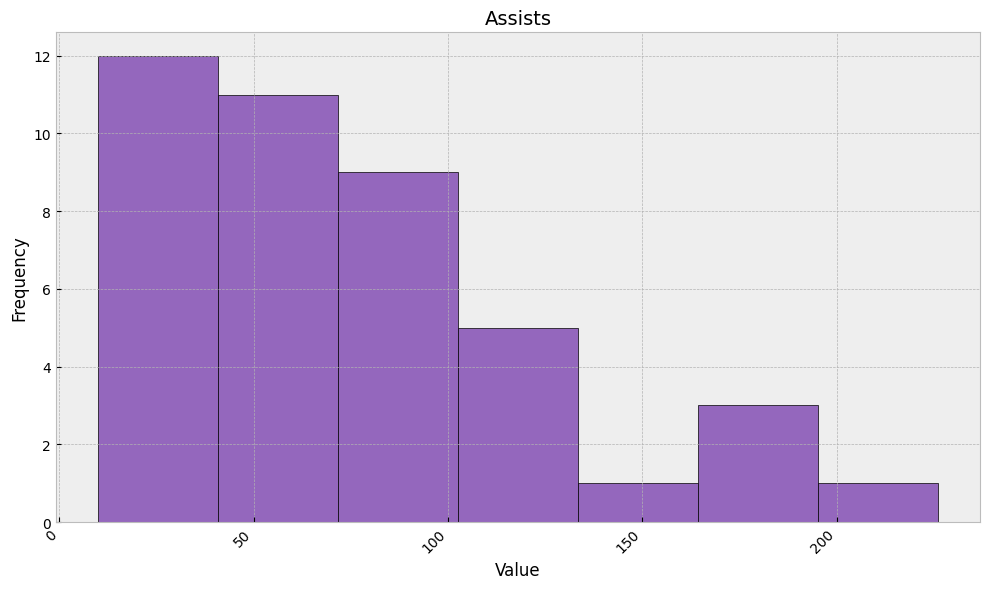

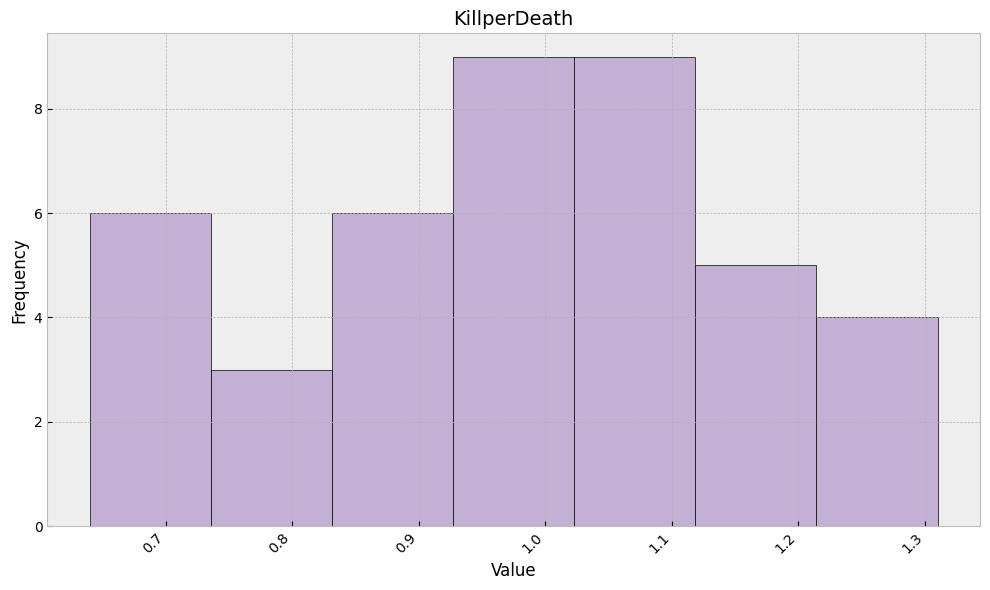

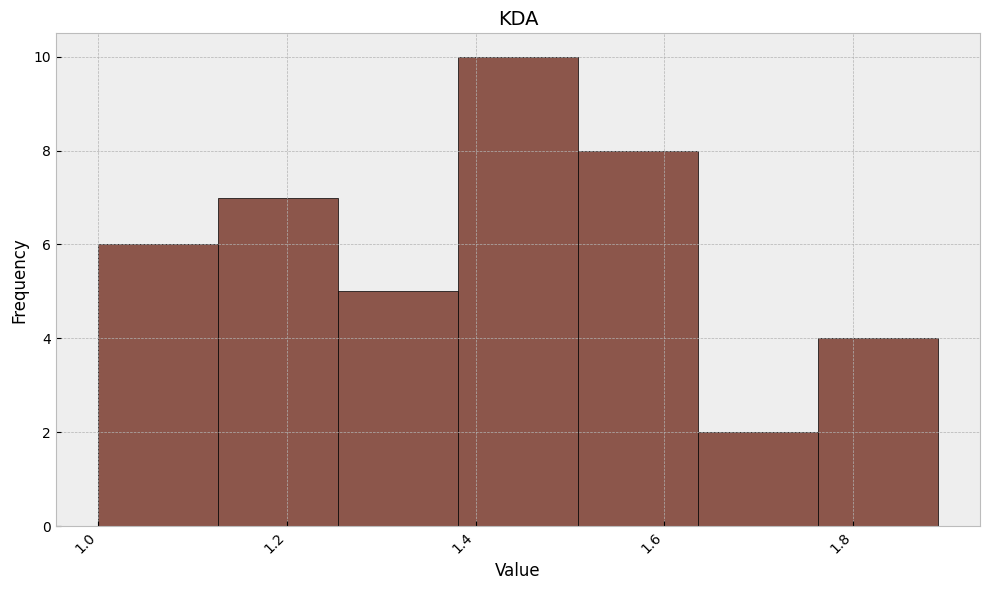

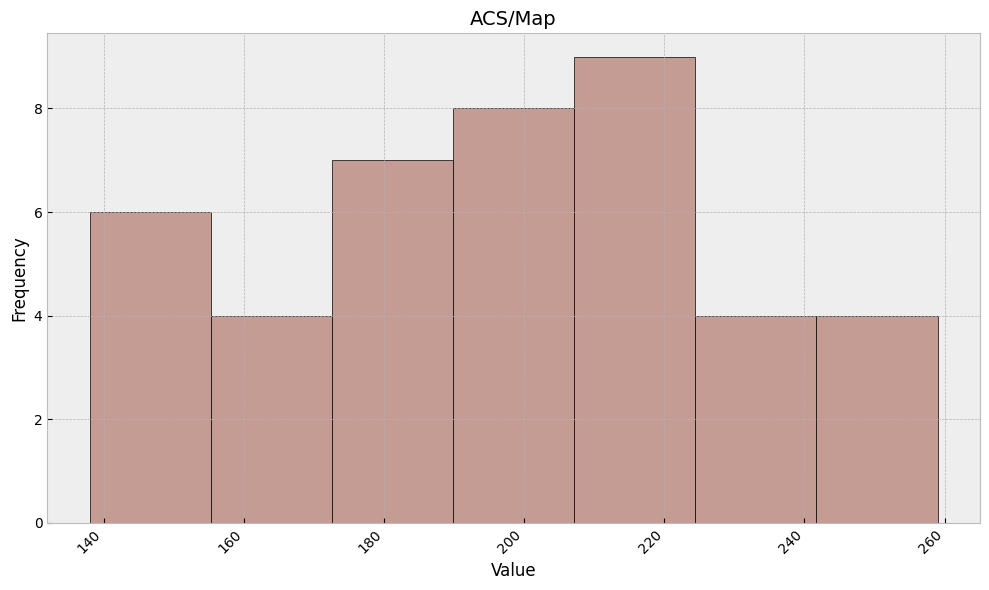

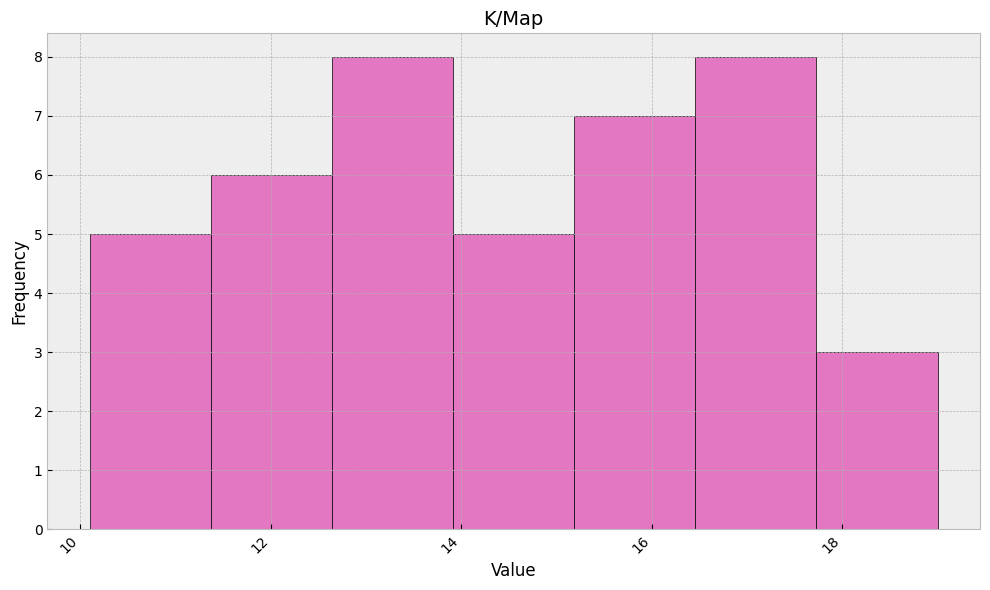

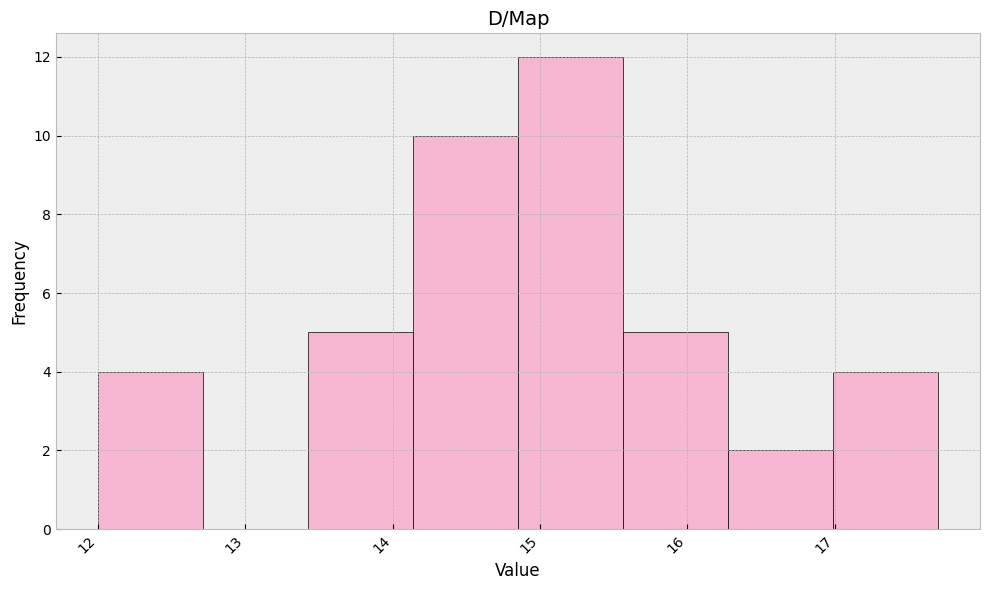

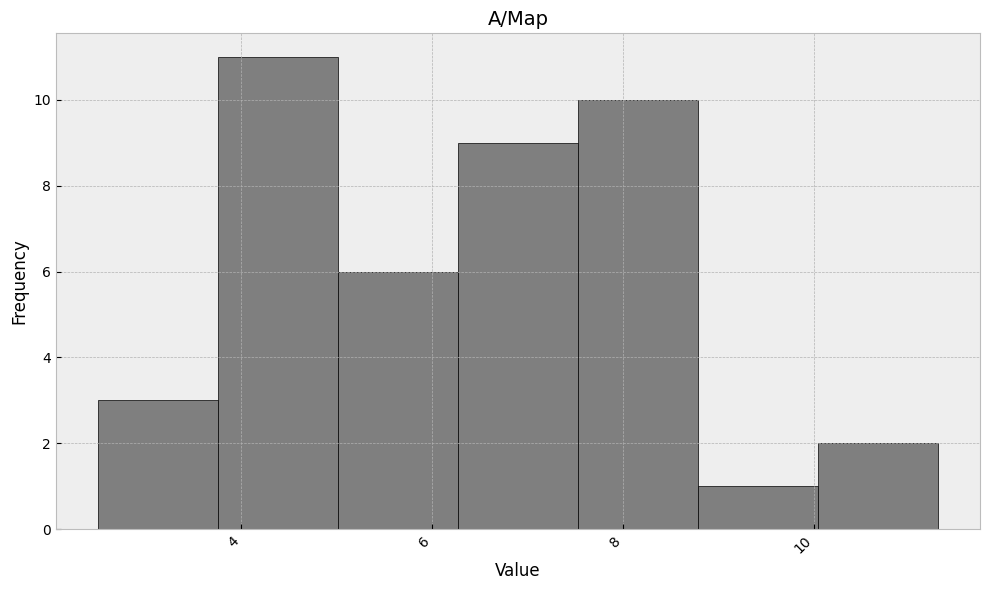

In [46]:
# Assign predictor variables and target variable
train_data = df[df.columns[1:]]
target_data = df[df.columns[0]]

# Color palette for histograms (Updated for Matplotlib 3.7+)
colors = plt.colormaps['tab20'].colors

# Obtain a histogram of each data column for Player's stats
for i in range(len(df.columns)):
    currData = df[df.columns[i]]
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(currData):
        # Handle missing values for numeric data (filling with mean)
        currData = currData.fillna(currData.mean())
        
        # Create a new figure for each histogram with a larger size
        plt.figure(figsize=(10, 6))  # Adjust the size of the figure
        
        # Plot the histogram with different colors
        plt.hist(currData, bins='auto', edgecolor='black', color=colors[i % len(colors)])
        
        # Add labels and title
        plt.title(df.columns[i], fontsize=14)
        plt.xlabel('Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Prevent overlapping and ensure everything fits
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        
        # Close all open figures to prevent overlap
        plt.close("all")
    
    # If the column is not numeric (categorical data), handle it differently
    else:
        # Handle missing values for non-numeric data (filling with mode)
        currData = currData.fillna(currData.mode()[0])
        
        # You could visualize the frequency of categories here, if needed:
        # Create a new figure for the categorical data histogram
        plt.figure(figsize=(10, 6))  # Adjust the size of the figure
        
        # Plot a bar chart for categorical data
        currData.value_counts().plot(kind='bar', color=colors[i % len(colors)], edgecolor='black')
        
        # Add labels and title
        plt.title(df.columns[i], fontsize=14)
        plt.xlabel('Category', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Prevent overlapping and ensure everything fits
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        
        # Close all open figures to prevent overlap
        plt.close("all")


### **Fetching file i.e Map Statistics.csv** 


Map  Total  Round 1  Round 2  Round 3  Playoffs
0  Ascent      6        1        0        1         4
1    Bind      7        2        1        1         3
2  Breeze      6        1        2        1         2
3  Icebox      7        2        2        1         2
4   Lotus      8        2        2        1         3

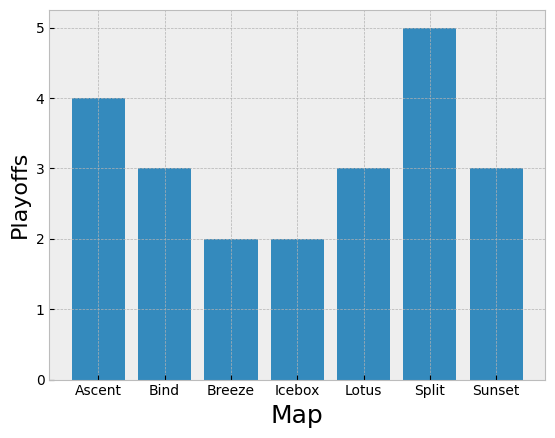

In [47]:
df1 = pd.read_csv('Map Statistics.csv')
#map na value 
x=df1['Map']
y=df1['Playoffs']
#Bar Graph
plt.xlabel('Map',fontsize=18)
plt.ylabel('Playoffs', fontsize=16)
plt.bar(x,y)
df1.head()

### **Fetching file Map banned.csv**

Map  Total  Round 1  Round 2  Round 3  Playoffs
0       -      2        0        0        0         2
1  Ascent     10        3        4        1         2
2    Bind      9        2        3        1         3
3  Breeze     10        3        2        1         4
4  Icebox      9        2        2        1         4

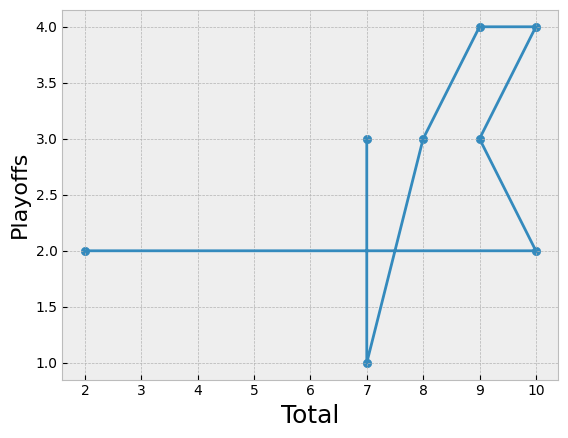

In [48]:
df2 = pd.read_csv('Maps Banned.csv')
#line Graph
x=df2['Total']
y=df2['Playoffs']
plt.xlabel('Total',fontsize=18)
plt.ylabel('Playoffs',fontsize=16)
plt.scatter(x,y)
plt.plot(x,y)
df2.head()


### **Fetching file Side Statistics.csv**

In [49]:
df3=pd.read_csv('Side Statistics.csv')
df3.head()#Viewing the data record 

Map  Atk Wins Count  Atk Wins Percentage  Def Wins Count  \
0  Ascent              54                 50.0              54   
1    Bind              47                 49.5              48   
2  Breeze              56                 55.4              45   
3  Icebox              68                 54.0              58   
4   Lotus              98                 54.7              81   

   Def Wins Percentage  
0                 50.0  
1                 50.5  
2                 44.6  
3                 46.0  
4                 45.3

### **Basic steps / Basic Operations **

**1. Show all columns in  Player Statistics.csv**

In [50]:
df.columns 

Index(['Player', 'Age', 'Team', 'Current Team', 'Birth Date', 'Maps', 'Kills',
       'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map',
       'A/Map'],
      dtype='object')

**2. Give info of player statistics**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        42 non-null     object 
 1   Age           42 non-null     float64
 2   Team          42 non-null     object 
 3   Current Team  42 non-null     object 
 4   Birth Date    42 non-null     object 
 5   Maps          42 non-null     int64  
 6   Kills         42 non-null     int64  
 7   Deaths        42 non-null     int64  
 8   Assists       42 non-null     int64  
 9   KillperDeath  42 non-null     float64
 10  KDA           42 non-null     float64
 11  ACS/Map       42 non-null     int64  
 12  K/Map         42 non-null     float64
 13  D/Map         42 non-null     float64
 14  A/Map         42 non-null     float64
dtypes: float64(6), int64(5), object(4)
memory usage: 5.1+ KB


**3. Give info of Map Satistics.csv**

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Map       7 non-null      object
 1   Total     7 non-null      int64 
 2   Round 1   7 non-null      int64 
 3   Round 2   7 non-null      int64 
 4   Round 3   7 non-null      int64 
 5   Playoffs  7 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 468.0+ bytes


**4. Give info of Map banned.csv**

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Map       8 non-null      object
 1   Total     8 non-null      int64 
 2   Round 1   8 non-null      int64 
 3   Round 2   8 non-null      int64 
 4   Round 3   8 non-null      int64 
 5   Playoffs  8 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 516.0+ bytes


**5. Give info of Side statistics.csv**

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Map                  7 non-null      object 
 1   Atk Wins Count       7 non-null      int64  
 2   Atk Wins Percentage  7 non-null      float64
 3   Def Wins Count       7 non-null      int64  
 4   Def Wins Percentage  7 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 412.0+ bytes


**6. No. of duplicate dataitem in Player statics:**

In [55]:
df.duplicated().sum()

0

**7.Performing decidion tree operation on the following target column :**

In [56]:
#gives no. of rows & no. of columns 
df.shape

(42, 15)

**Checking the null values in the Player's statistic** 

In [57]:
df[df.isnull().any(axis=1)].head()
#no need of data cleaning as redundant data not found


Empty DataFrame
Columns: [Player, Age, Team, Current Team, Birth Date, Maps, Kills, Deaths, Assists, KillperDeath, KDA, ACS/Map, K/Map, D/Map, A/Map]
Index: []

In [58]:
#creating new coloum as y and coping data from df.player stats
y = df[['Assists']].copy()
y.head()

Assists
0       90
1       39
2       65
3       37
4       16

In [59]:
x = df[['Deaths']].copy()
x.columns

Index(['Deaths'], dtype='object')

# **What are the 10 most popular agents in Valorant ?** 

In [60]:
#1st Question .
#Player's Statistics .
# Sort the dataframe by Pick Rate in descending order
df_sorted = df.sort_values(by="Kills", ascending=False)

# Print the top 10 most popular agents
print(df_sorted.head(10))

       Player   Age           Team    Current Team  Birth Date  Maps  Kills  \
0      zekken  19.0      Sentinels       Sentinels  2005-03-19    20    381   
16       TenZ  23.0      Sentinels       Sentinels  2001-05-05    20    314   
19     johnqt  26.0      Sentinels       Sentinels  1998-09-21    20    293   
15  something  22.0      Paper Rex       Paper Rex  2002-02-11    17    274   
12   f0rsakeN  20.0      Paper Rex       Paper Rex  2004-03-25    17    273   
7      Meteor  24.0  Gen.G Esports   Gen.G Esports  1999-12-19    16    268   
8     t3xture  24.0  Gen.G Esports   Gen.G Esports  1999-07-20    16    264   
26    Zellsis  26.0      Sentinels       Sentinels  1998-03-02    20    263   
18     Monyet  19.0      Paper Rex  Rex Regum Qeon  2005-06-05    17    250   
30       Sacy  26.0      Sentinels       Sentinels  1997-12-02    20    249   

    Deaths  Assists  KillperDeath   KDA  ACS/Map  K/Map  D/Map  A/Map  
0      314       90          1.21  1.50      259   19.0   

# **LINEAR REFRESSION ON BOTH DATASET**
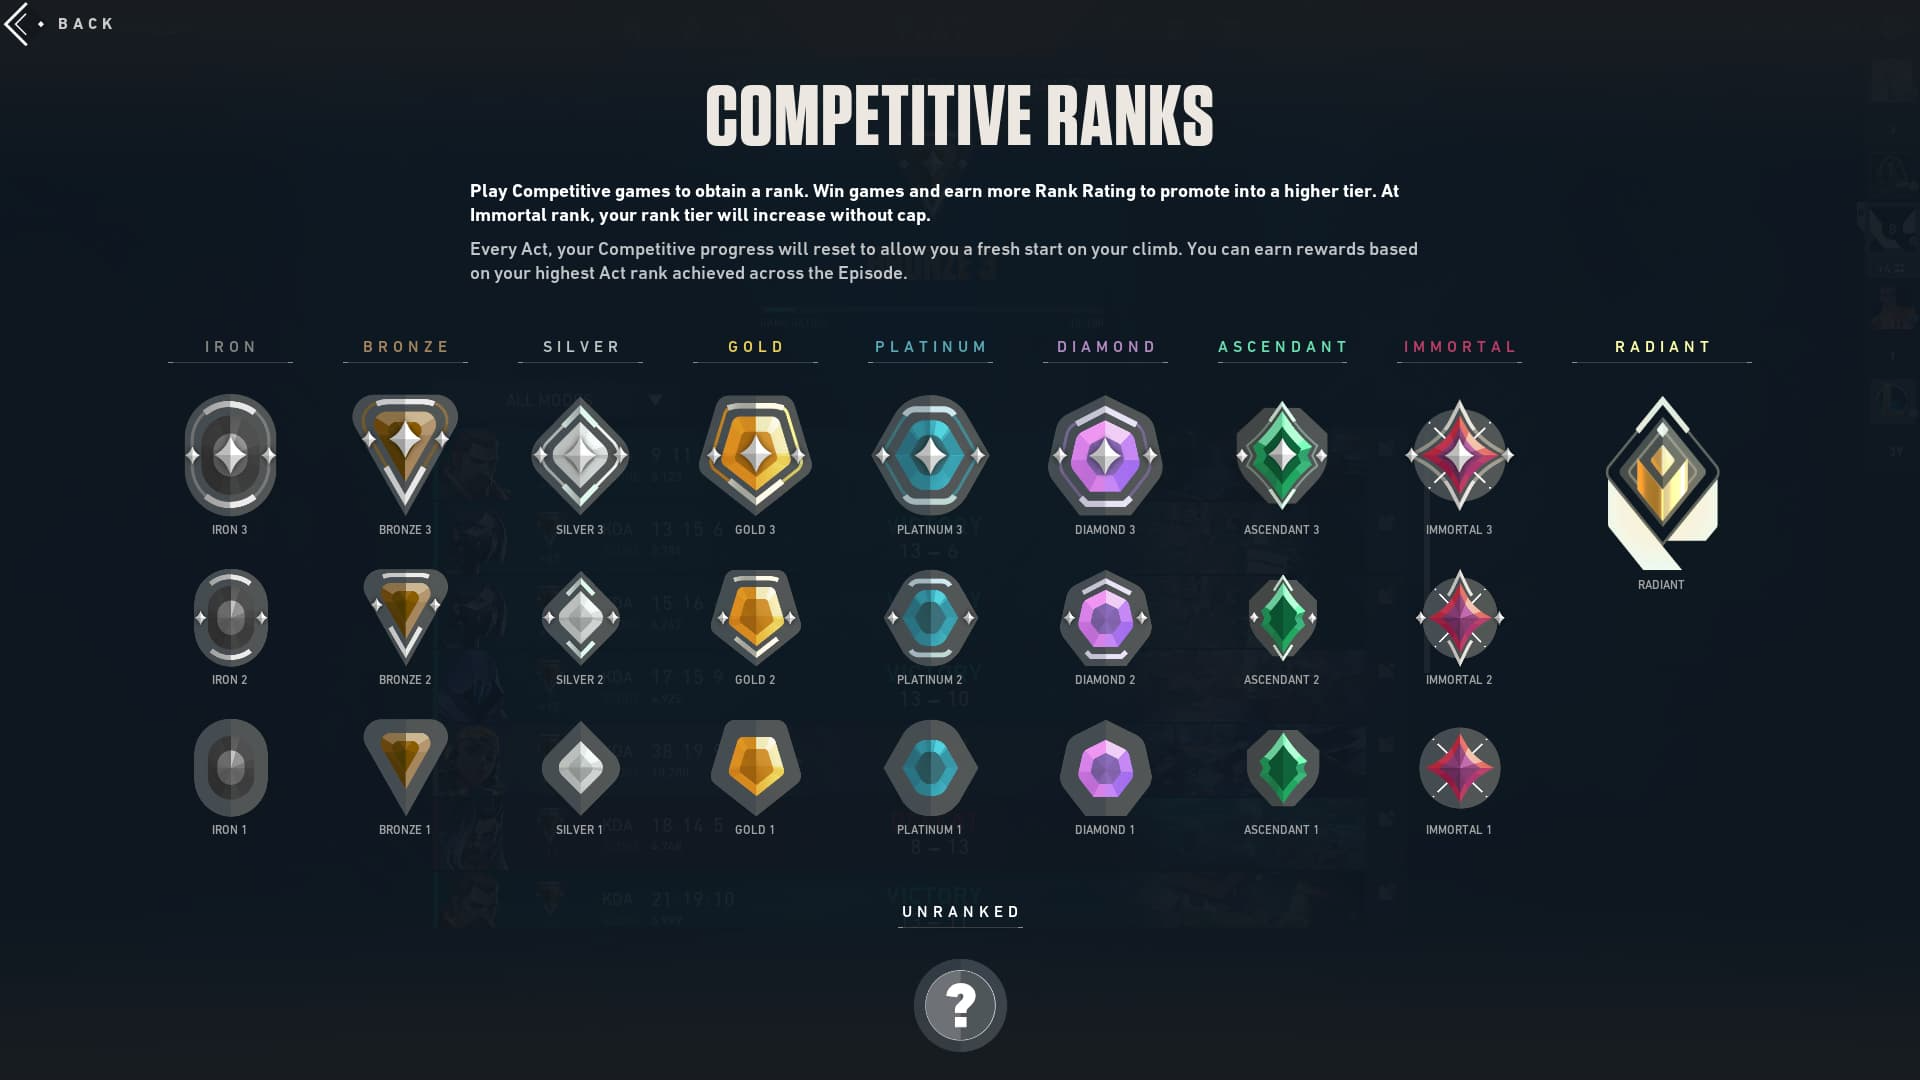

### LINEAR REGRESSION FOR DATASET-1 i.e Players Statistics.csv

Mean Squared Error: 0.18998560382022187
R-squared: 0.9725199394474322


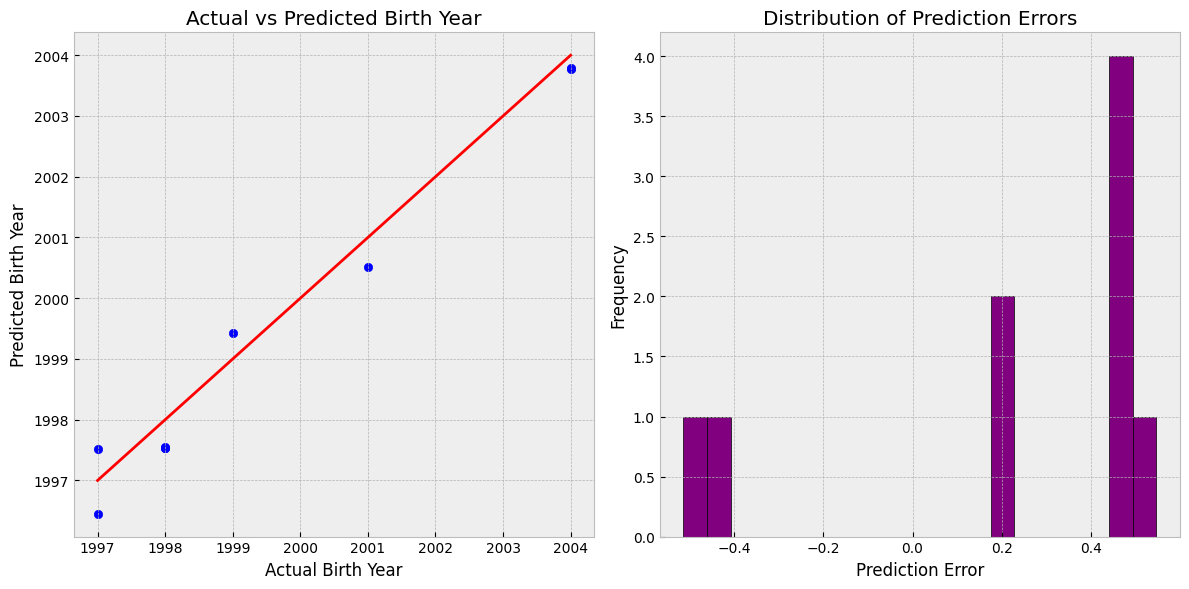

In [61]:
# Ensure the Birth Date is numeric (converted to year)
df['Birth Date'] = pd.to_datetime(df['Birth Date']).dt.year

# Define features (X) and target (y)
X = df[['Age', 'Kills', 'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map', 'A/Map']]
y = df['Birth Date']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict using the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Birth Year')
plt.ylabel('Predicted Birth Year')
plt.title('Actual vs Predicted Birth Year')

# Plot the error (difference between actual and predicted)
plt.subplot(1, 2, 2)
errors = y_test - y_pred
plt.hist(errors, bins=20, color='purple', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

# Show both plots
plt.tight_layout()
plt.show()

### LINEAR REGRESSION FOR DATASET-2 i.e FianlStats.csv

In [62]:
val_df = pd.read_csv('FinalStats.csv')
val_df.head()

Elo Gain  ACS  Econ  Enemy Losses  First Bloods  Plants  Defuses  Kills  \
0        31  303    80             9             6       0        0     23   
1        38  367   101             1             4       0        0     18   
2        21  211    54            12             3       0        0     18   
3        19  227    64            11             5       0        1     19   
4        21  218    55             8             2       0        0     18   

   Deaths  Assists  
0      15        7  
1       8        7  
2      18        5  
3      17        5  
4      13        2

Data from model, ELO Gain per Kills

In [63]:
X = val_df['Elo Gain'].values
y = val_df['Kills'].values

Reshaping the ELO Gain Data

In [64]:
# Test Train Split needs data in this format to process
X = X.reshape(-1,1)

Train, Test, Split Data

In [65]:
# We're splitting the data up and grabbing 100 random rows, train 80%, test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

Plot the scatter points

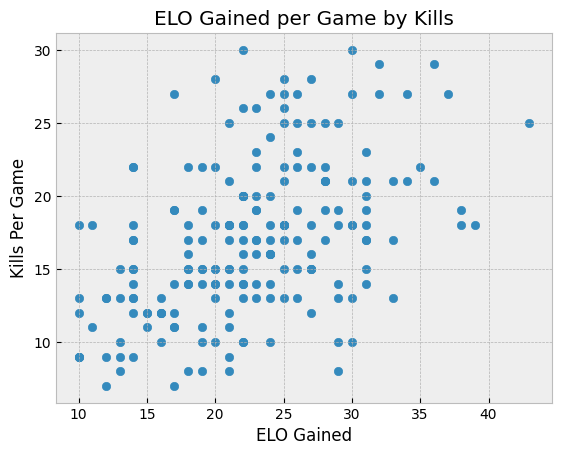

In [66]:
plt.scatter(X_train, y_train)
plt.xlabel('ELO Gained')
plt.ylabel('Kills Per Game')
plt.title('ELO Gained per Game by Kills')
plt.show()

Regression Model Score

In [67]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)
print(f'Train Accuracy {round(lm.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(X_test, y_test)* 100,2)}%')

Train Accuracy 22.53%
Test Accuracy 27.5%


 Display Trained Model with Linear Regression

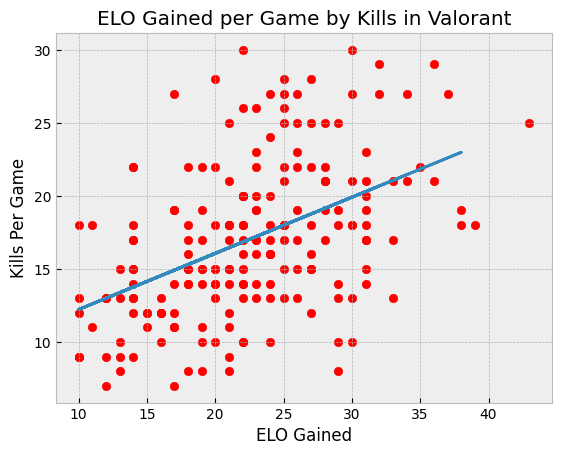

In [68]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_predict)
plt.xlabel('ELO Gained')
plt.ylabel('Kills Per Game')
plt.title('ELO Gained per Game by Kills in Valorant')
plt.show()


The more kills you get, the more your ELO goes up sometimes

You can get under 20 kills and still receive almost 40 ELO to rank up

Getting kills is not the most important thing to rank up, some other variables may come into consideration such as econ rating, deaths, assists, spikes planted

#  **DECISION TREE FOR BOTH DATASET** 


### Decision Tree for Player Statistics.csv 

Accuracy: 92.31


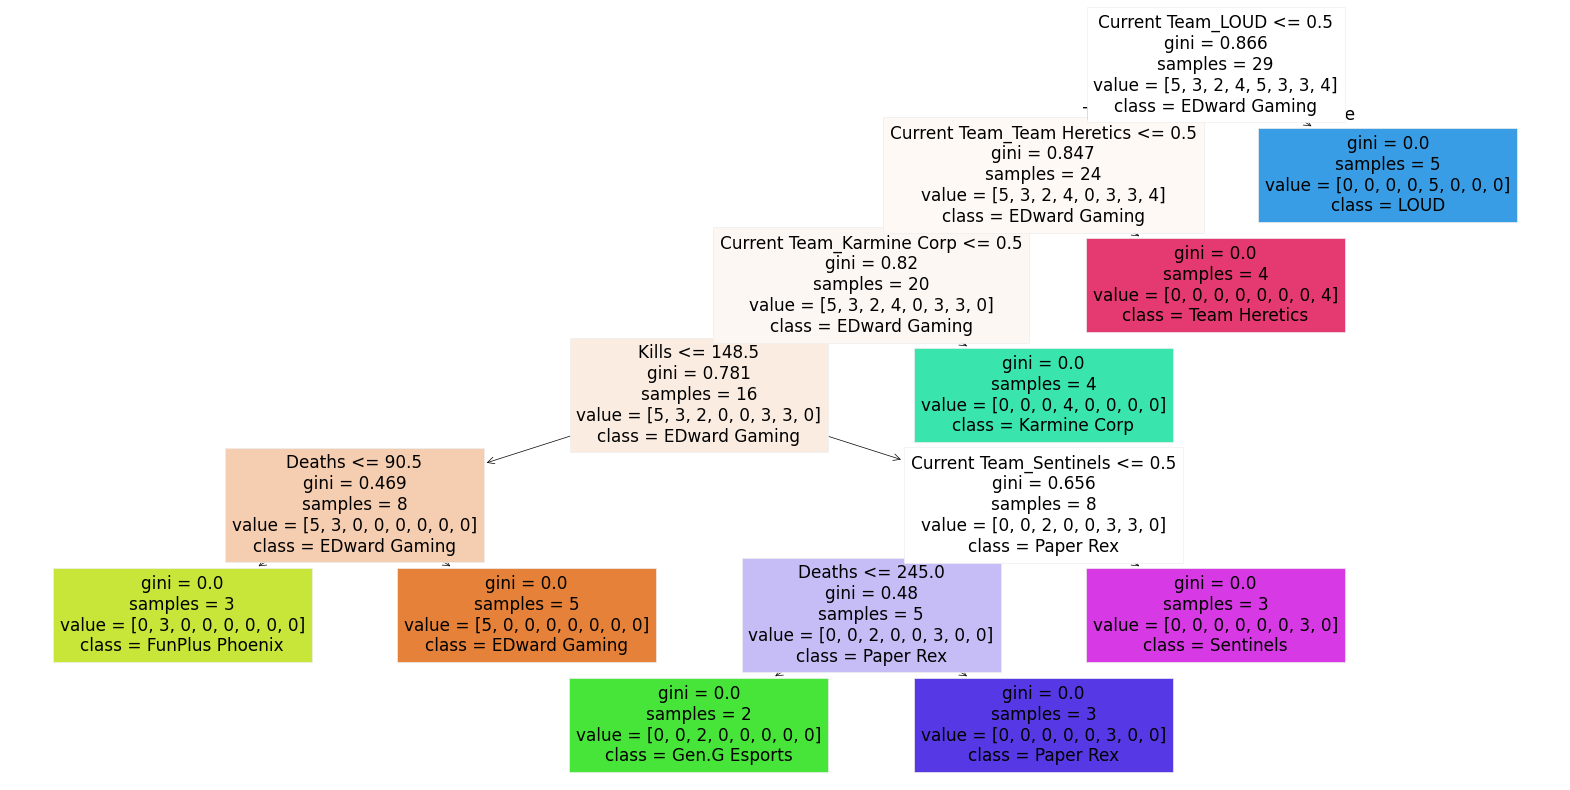

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('Player Statistics.csv')

# Choose a target variable
target = 'Team'
features = [col for col in data.columns if col != target and col not in ['Birth Date', 'Player']]  # Exclude non-numeric or irrelevant columns

# Prepare features and target variable
X = data[features]
y = data[target]

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X = X.copy()

# Handle missing values
# Numerical features: fill with median
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])

# Categorical features: fill with mode or a constant value
if not categorical_cols.empty:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
else:
    print("No categorical columns found.")

# Convert categorical variables to numeric if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Decision Tree Classifier with default parameters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(c) for c in clf.classes_])
plt.show()

### Decision Tree on FinalStats.csv

Accuracy: 59.21%


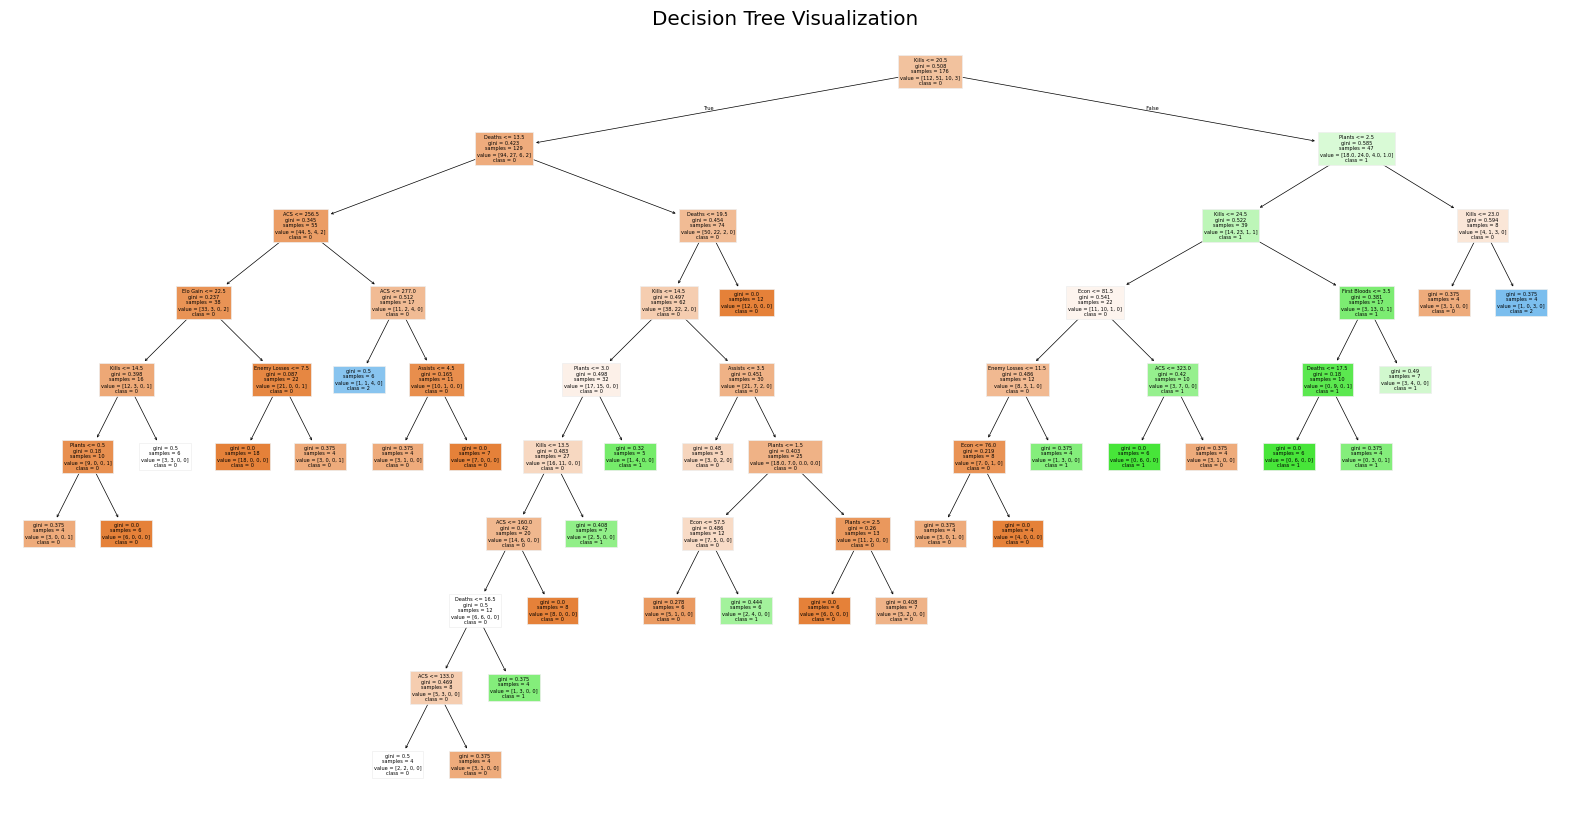

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Load your dataset
val_df = pd.read_csv('FinalStats.csv')

# Prepare features and target variable
target = 'Defuses'
features = [col for col in val_df.columns if col != target]
X = val_df[features]
y = val_df[target]

# Handle missing values and convert categorical variables
X = X.fillna(X.median())
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize StratifiedKFold
min_class_count = y_train.value_counts().min()
n_splits = max(2, min(5, min_class_count))
skf = StratifiedKFold(n_splits=n_splits)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Fit GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and predict on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=[str(c) for c in best_clf.classes_])
plt.title("Decision Tree Visualization")
plt.show()

#  **HEATMAP FOR BOTH DATASET** 

### HEATMAP FOR DATASET-1 i.e Players Statistics.csv

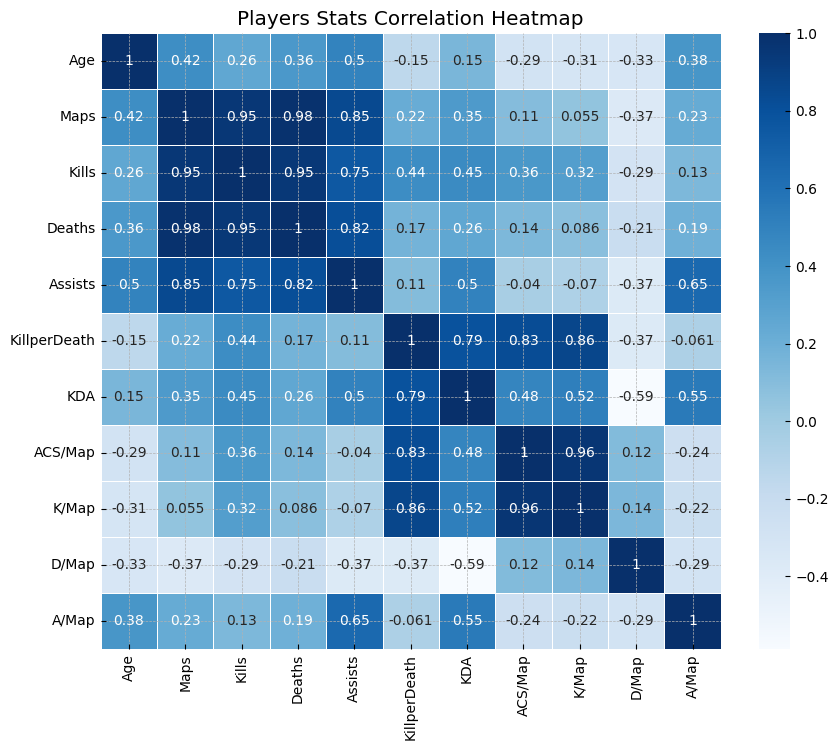

In [71]:
# Select only the numeric columns for the heatmap
# Assuming these columns are numeric: Age, Maps, Kills, Deaths, Assists, KillperDeath, KDA, ACS/Map, K/Map, D/Map, A/Map
numeric_columns = ['Age', 'Maps', 'Kills', 'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map', 'A/Map']

# Filter the dataframe to include only numeric columns
df_numeric = df[numeric_columns]

# Generate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sn.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Add titles and labels
plt.title('Players Stats Correlation Heatmap')
plt.show()

#to list all color in heatmap :use below code and then put the value in cmap .
# print(plt.colormaps())

## Heatmap Analysis
From the model above, we can identify several highly correlated features. 

- High Positive Correlation:

    Kills and ACS/Map: Approximately 0.9. Players with more kills generally have a higher Average Combat Score per map.

    KDA and KillperDeath: Around 0.85. Players with a higher KDA ratio tend to have a better KillperDeath ratio.

    Kills and Assists: About 0.75. Players who get more kills also tend to get more assists.

- Insights:

    Redundancy: Features with high correlations, such as Kills and ACS/Map, may provide redundant information, which could influence feature selection.

    Feature Engineering: Strong correlations suggest the potential for combining or transforming features to enhance analysis or reduce dimensionality.







### HEATMAP FOR DATASET-2 i.e Players Statistics.csv

Pearson correlation of elo gain and ACS:  0.6934359956918335
Pearson correlation of elo gain and Econ:  0.6732646349345409
Pearson correlation of elo gain and Enemy Losses:  -0.3537333387795786
Pearson correlation of elo gain and First Bloods:  0.31262376457511043
Pearson correlation of elo gain and Plants:  -0.004277808537623363
Pearson correlation of elo gain and Defuses:  0.0938630666089981
Pearson correlation of elo gain and Kills:  0.500532154572309
Pearson correlation of elo gain and Deaths:  -0.44633263040702525
Pearson correlation of elo gain and Assists:  -0.030403259081802785


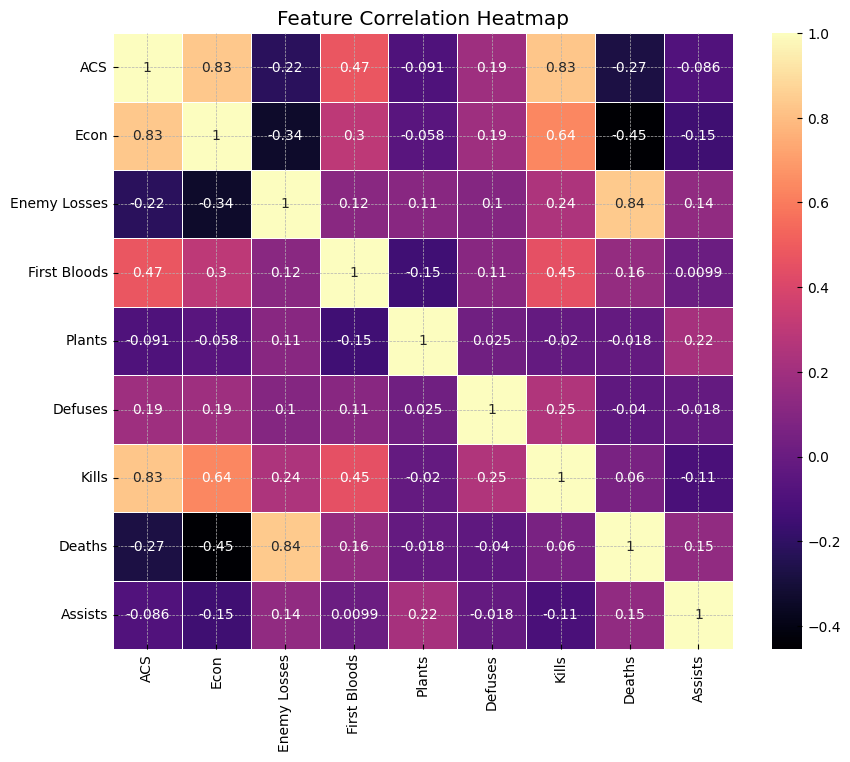

In [72]:
# Assign the predictor variables and target variable
train_data = val_df[val_df.columns[1:]]
target_data = val_df[val_df.columns[0]]

# Print feature names and their Pearson correlation with the target variable
for featureNum, featureName in enumerate(val_df.columns[1:]):
    print(f"Pearson correlation of elo gain and {featureName}: ", target_data.corr(val_df[val_df.columns[1 + featureNum]]))

# Generate the feature Pearson correlation matrix
corr_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust figure size if needed
sn.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.show()

#to list all color in heatmap :use below code and then put the value in cmap .
# print(plt.colormaps())

## Heatmap Analysis
From the model above, we can identify several highly correlated features. 

- Econ Score and ACS: 0.85 r score
- Kills and ACS: 0.82 r score
- Deaths and Enemy Losses: 0.84 r score
- etc

This violates the assumption of independent predictor variables for Multiple Linear Regression (MLR), thus this simple, interpretable model cannot be used (a mistake I did not catch in my initial notebook), unless data normalization is done.

Going forward, XGBoost, a 'black-box' model will be used. Although its 'black-box' nature means that it is more difficult to interpret its findings, its increased predictive accuracy over MLR and more naive (simpler) algorithms indicate (more patterns learned from) (needs a new word) the dataset.

#  **K means clustering algorithm FOR BOTH DATASET** 

### K means FOR DATASET-1 i.e Players Statistics.csv

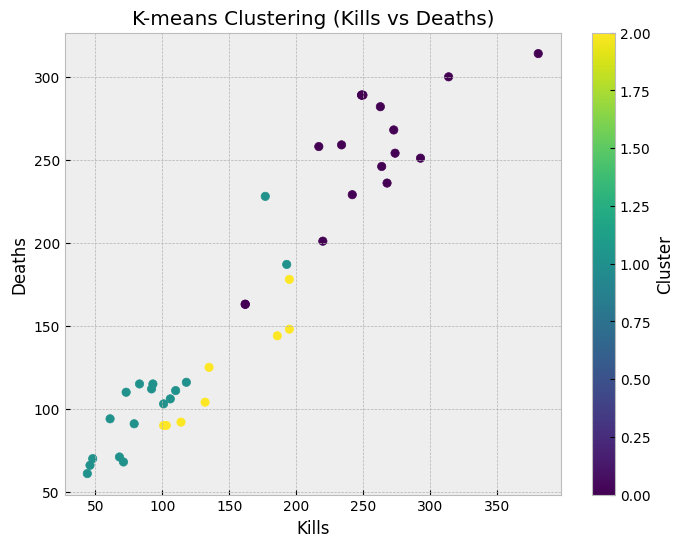

Cluster Centers (Original Scale):
         Age       Kills      Deaths     Assists  KillperDeath       KDA  \
0  23.941176  253.823529  252.411765  120.117647      1.003529  1.482941   
1  21.647059   91.941176  107.294118   40.058824      0.844706  1.218824   
2  19.750000  145.125000  121.375000   55.875000      1.190000  1.648750   

      ACS/Map      K/Map      D/Map     A/Map  
0  200.117647  14.670588  14.576471  6.888235  
1  177.588235  13.129412  15.452941  5.705882  
2  226.750000  17.050000  14.350000  6.450000  


In [73]:
# Define features (X) for clustering
X = df[['Age', 'Kills', 'Deaths', 'Assists', 'KillperDeath', 'KDA', 'ACS/Map', 'K/Map', 'D/Map', 'A/Map']]

# Standardize the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Visualize the clusters using two features for simplicity (e.g., 'Kills' and 'Deaths')
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Kills'], df['Deaths'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('K-means Clustering (Kills vs Deaths)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# If you'd like to inspect the cluster centers, inverse transform them back to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)

print("Cluster Centers (Original Scale):")
print(cluster_df)


### K means FOR DATASET-2 i.e FinalStats.csv

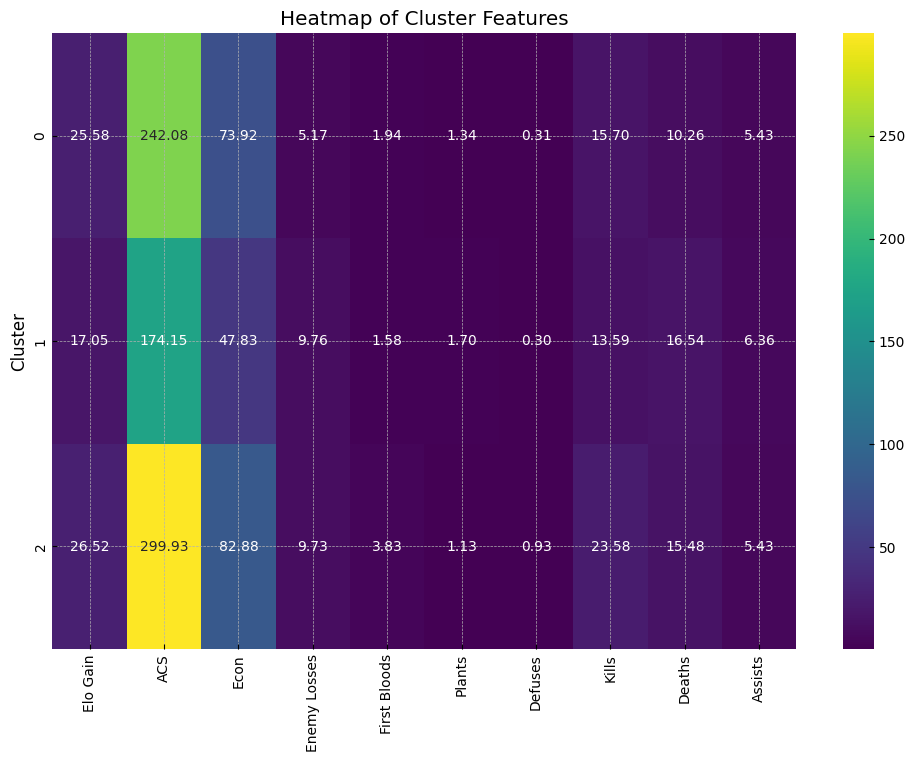

In [74]:
# Define features (X) for clustering
X = val_df[['Elo Gain', 'ACS', 'Econ', 'Enemy Losses', 'First Bloods', 'Plants', 'Defuses', 'Kills', 'Deaths', 'Assists']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
val_df['Cluster'] = kmeans.labels_

# Compute mean values of features for each cluster
cluster_summary = val_df.groupby('Cluster').mean()

# Plot heatmap of the cluster summaries
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Cluster Features')
plt.show()


#  **Outliers FOR BOTH DATASET** 

### Outliers FOR DATASET-1 i.e Players Statistics.csv

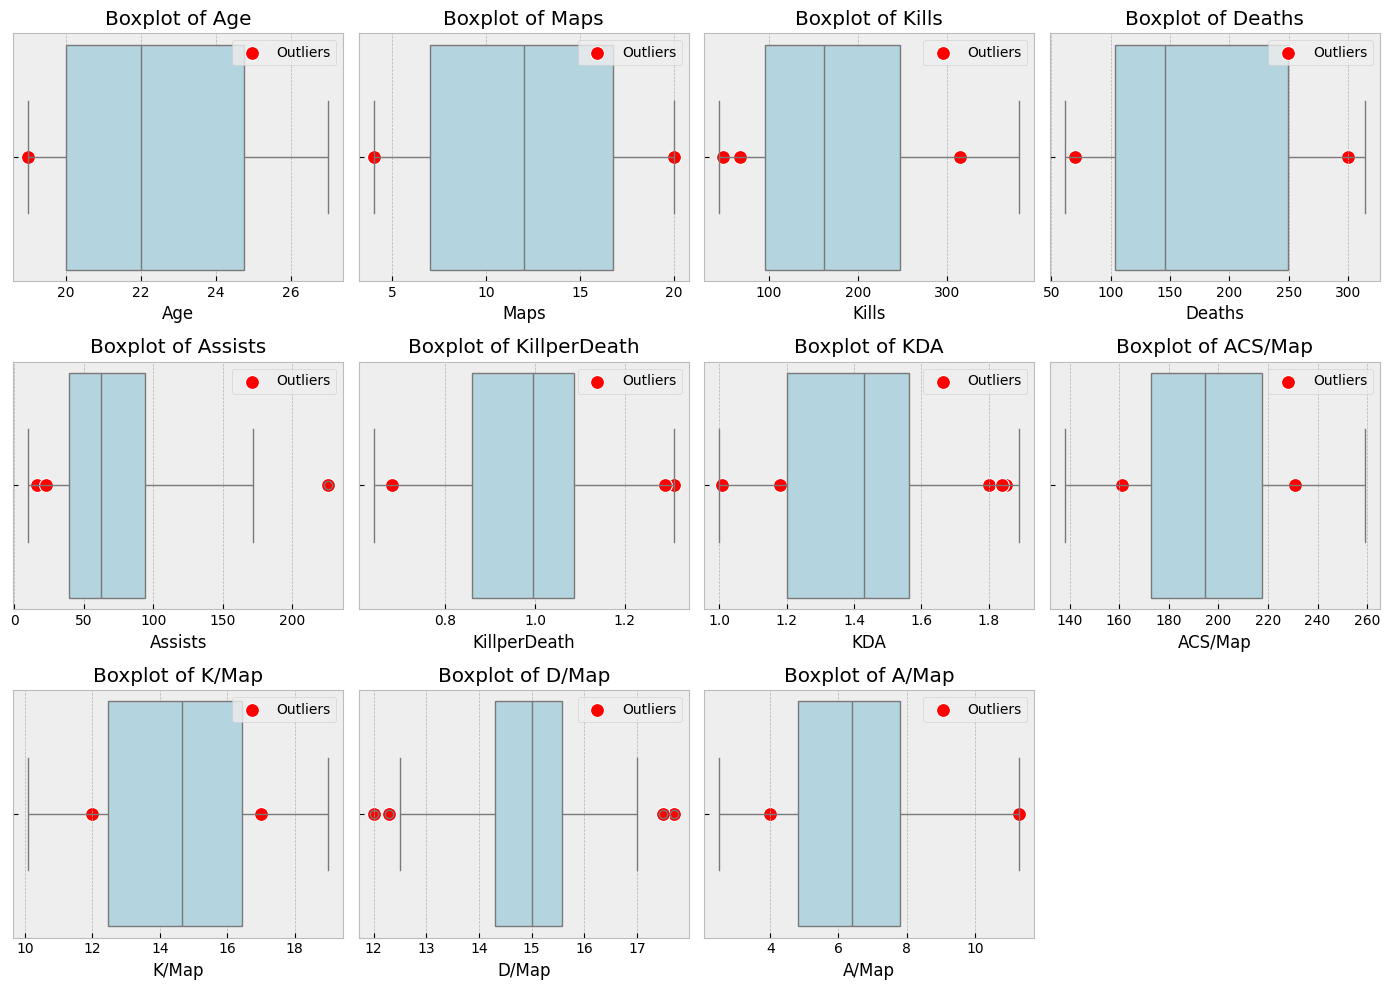

In [77]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not column_outliers.empty:
            outliers = pd.concat([outliers, column_outliers])
    return outliers.drop_duplicates()

# Detect outliers
outliers_iqr = detect_outliers_iqr(df)

# Function to plot data and highlight outliers
def plot_outliers(df, outliers):
    plt.figure(figsize=(14, 10))
    
    # Plot boxplots for each numerical column
    for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        plt.subplot(3, 4, i + 1)  # Adjust subplot grid size as needed
        sn.boxplot(data=df, x=column, color='lightblue')
        if not outliers.empty:
            sn.scatterplot(x=column, y=[0]*len(outliers), data=outliers, color='red', s=100, label='Outliers')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Plot outliers
plot_outliers(df, outliers_iqr)

### Outliers FOR DATASET-2 i.e FinalStats.csv

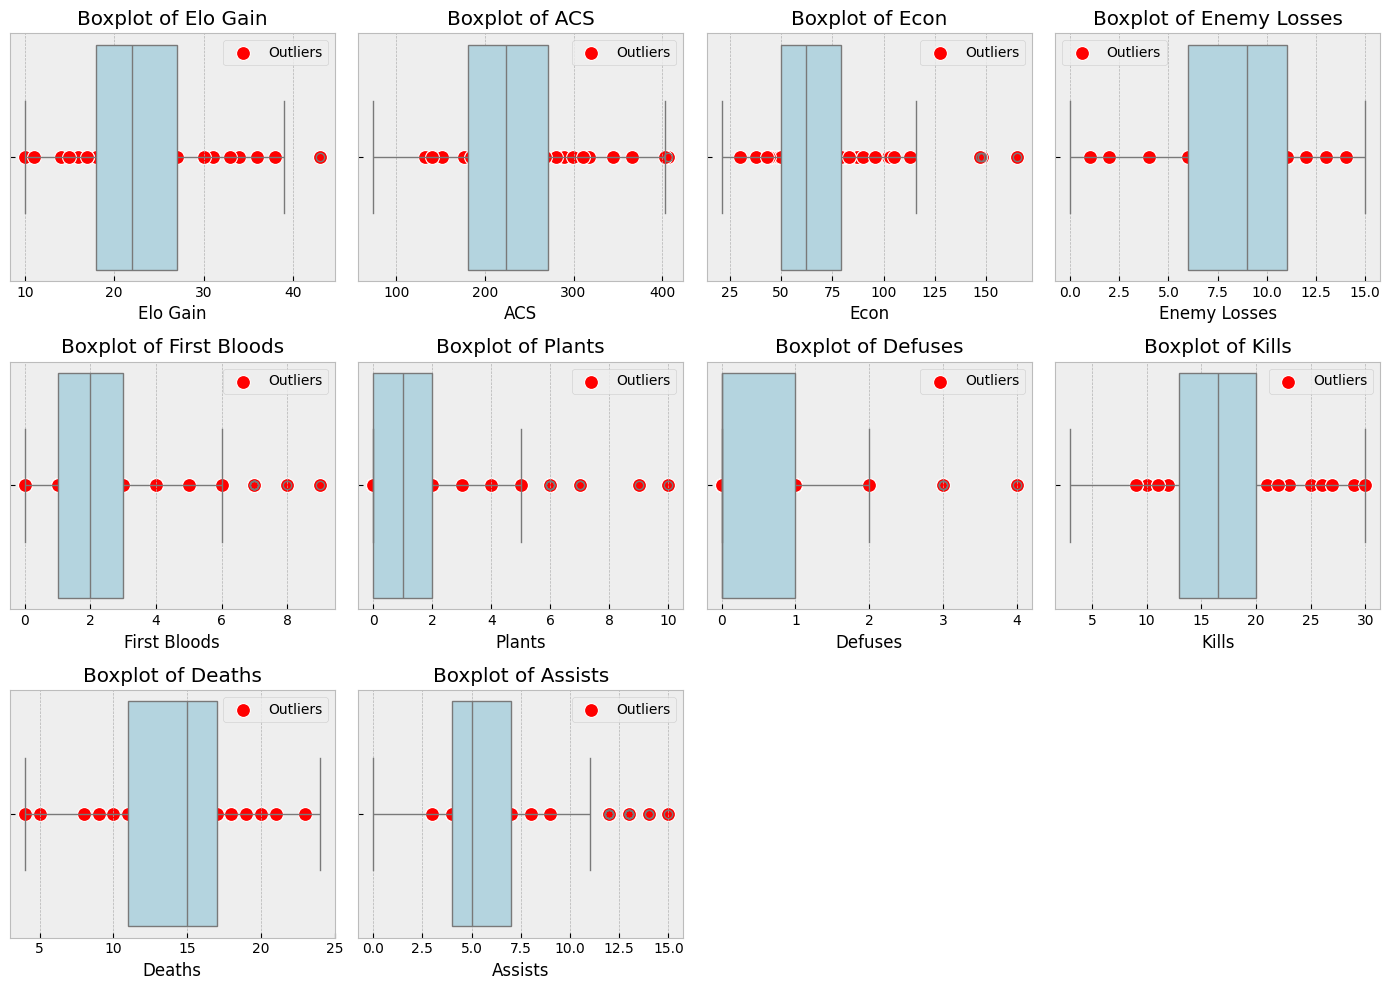

In [76]:
# Function to detect outliers using IQR
def detect_outliers_iqr(val_df):
    outliers = pd.DataFrame()
    for column in val_df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = val_df[column].quantile(0.25)
        Q3 = val_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = val_df[(val_df[column] < lower_bound) | (val_df[column] > upper_bound)]
        if not column_outliers.empty:
            outliers = pd.concat([outliers, column_outliers])
    return outliers.drop_duplicates()

# Detect outliers
outliers_iqr = detect_outliers_iqr(val_df)

# Function to plot data and highlight outliers
def plot_outliers(val_df, outliers):
    plt.figure(figsize=(14, 10))
    
    # Plot boxplots for each numerical column
    for i, column in enumerate(val_df.select_dtypes(include=['float64', 'int64']).columns):
        plt.subplot(3, 4, i + 1)  # Adjust subplot grid size as needed
        sn.boxplot(data=val_df, x=column, color='lightblue')
        if not outliers.empty:
            sn.scatterplot(x=column, y=[0]*len(outliers), data=outliers, color='red', s=100, label='Outliers')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Plot outliers
plot_outliers(val_df, outliers_iqr)


# **Project by<br>**
### **Tanishka Das<br>**
### **Shruti Borhade<br>**
### **Anushka Chavan<br>**
### **[GitHub](https://github.com/tanishka786/Valo-player-s-stats-analysis.git)**
